# Feature Engineering & Exploratory Data Analysis

In this section we will explore the dataset further and create new features.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
# reading data in
df = pd.read_csv('/Users/sarinaamin/Desktop/capstone/genre-predictions-v2/kaggle-final-190120.csv')

In [4]:
# current columns
df.columns

Index(['song', 'year', 'artist', 'genre', 'lyrics', 'acousticness',
       'analysis_url', 'danceability', 'duration_ms', 'energy', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri',
       'valence'],
      dtype='object')

In [5]:
# removing features not needed
df.drop(['analysis_url', 'id', 'track_href', 'type', 'uri'], axis=1, inplace=True)

In [6]:
# changing data type of year from float to interger
df.year = df.year.astype('int')

### Feature Engineering

In [7]:
# creating new features for total number of words and number of unique words in a song

def words_count(lyrics):
    
    total_word_count = []
    unique_words = []
    
    for x in lyrics:
        
        # total number of words in a song
        total_word_count.append(len(x.split()))
        
        # finding total number of unique words in a song
        temp_set = set(x.split())

        if '' in temp_set:
            temp_set.remove('')
            
        unique_words.append(len(temp_set))
    
    return total_word_count, unique_words

total_word_count, unique_words = words_count(df.lyrics)

df['total_words'] = total_word_count
df['unique_words'] = unique_words

In [8]:
# creating a new feature for the ratio between number of unique words vs total number of words in each song 
df['unique_word_ratio'] = df.unique_words / df.total_words

In [9]:
df.head()

song  year   artist genre  \
0               ego remix  2009  beyoncé   Pop   
1                 honesty  2009  beyoncé   Pop   
2  all i could do was cry  2009  beyoncé   Pop   
3      once in a lifetime  2009  beyoncé   Pop   
4           save the hero  2009  beyoncé   Pop   

                                              lyrics  acousticness  \
0  Oh baby how you doing You know Im gonna cut ri...         0.114   
1  If you search For tenderness It isnt hard to f...         0.428   
2  I heard Church bells ringing I heard A choir s...         0.358   
3  This is just another day that I would spend Wa...         0.171   
4  I lay alone awake at night Sorrow fills my eye...         0.632   

   danceability  duration_ms  energy  instrumentalness  ...  liveness  \
0         0.711     283520.0   0.439          0.000000  ...    0.0573   
1         0.565     224387.0   0.442          0.000000  ...    0.1090   
2         0.372     190400.0   0.488          0.000706  ...    0.1040   
3         0.313     239533.0   0.556          0.000032  ...    0.1910   
4         0.550     274573.0   0.472          0.000000  ...    0.0788   

   loudness  mode  speechiness    tempo  time_signature  valence  total_words  \
0    -5.156   1.0       0.1380   78.074             4.0   0.3260          433   
1    -7.738   1.0       0.0309  135.990             4.0   0.0717          169   
2    -9.471   1.0       0.0720  185.262             3.0   0.5000          144   
3   -10.929   0.0       0.0465   79.209             3.0   0.4210          295   
4    -9.829   1.0       0.0334  116.966             4.0   0.1610          241   

   unique_words  unique_word_ratio  
0           144           0.332564  
1           110           0.650888  
2            73           0.506944  
3           113           0.383051  
4           107           0.443983  

[5 rows x 21 columns]

In [10]:
# examples of songs with equal to or less than 10 words in their lyrics
df[df.total_words <= 10].lyrics.head()

273                                     INSTRUMENTAL
419    im your lambskin cloak of love baby try me on
508                          El Arrebato Enhorabuena
640                                     Instrumental
643                                     Instrumental
Name: lyrics, dtype: object

In [11]:
# comparing genre value counts from starting data set to value counts if all songs with 10 or less words are removed
df.genre.value_counts()

Rock          23477
Pop           22449
Metal         15328
Hip-Hop       13003
Country        8720
Electronic     5219
Jazz           5069
Name: genre, dtype: int64

In [12]:
df[df.total_words <= 10].genre.value_counts()

Metal         671
Rock          566
Electronic    317
Pop           132
Jazz           95
Hip-Hop        83
Country        56
Name: genre, dtype: int64

### Distribution of Words in Song Lyrics

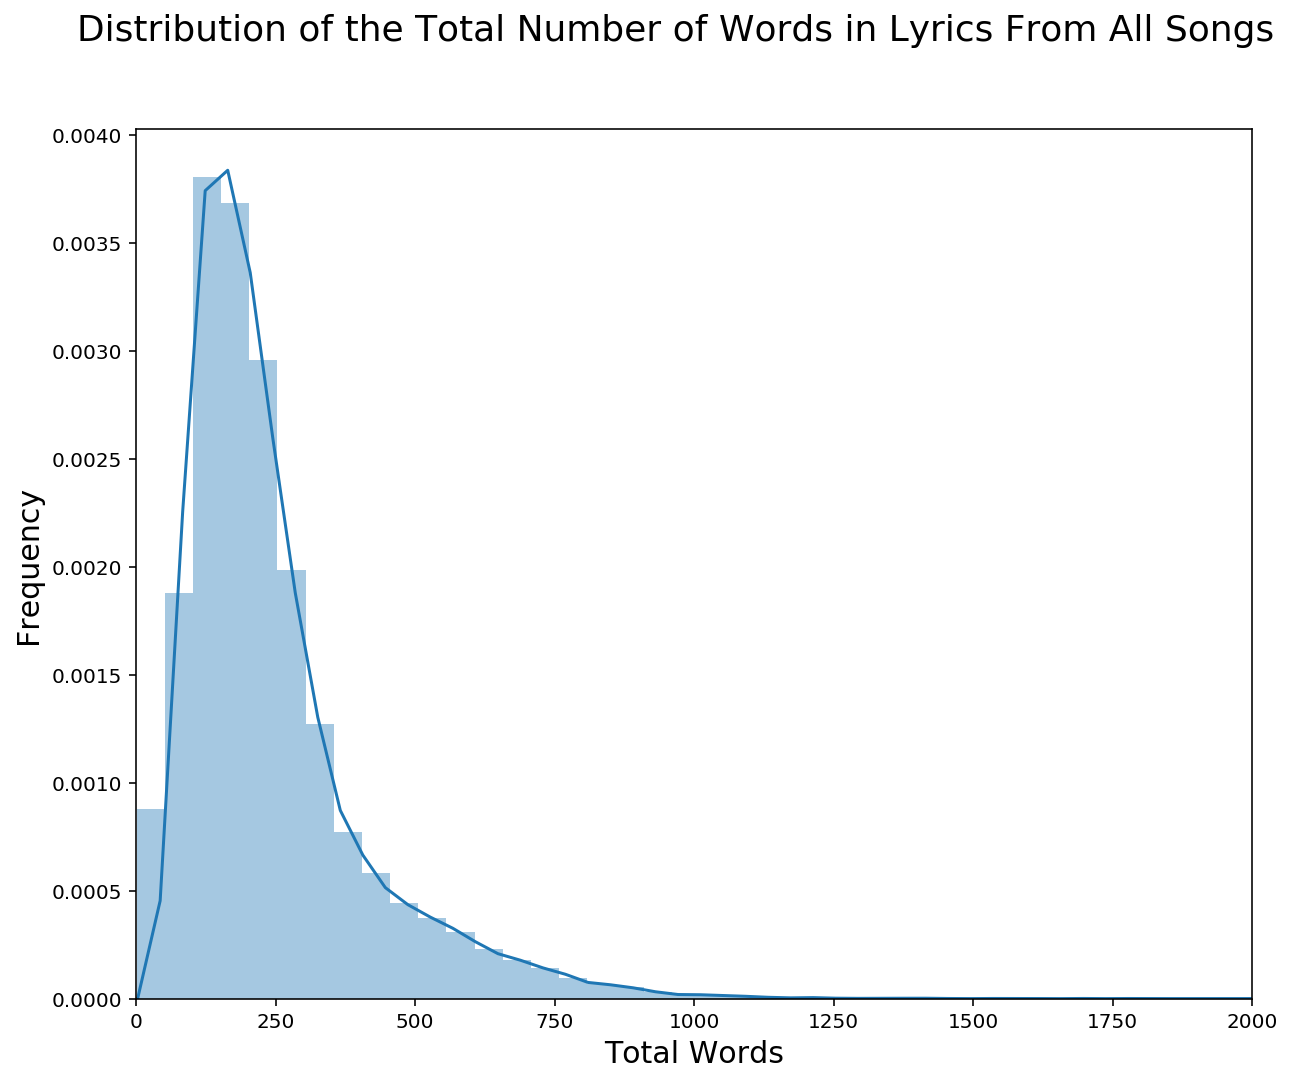

In [13]:
# The following histograms will examine the distribution of the total number of words in lyrics in all songs
# Later on I will do the same for each individual genre

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df['total_words'], bins=100)
ax.set_xlim(left=0, right=2000)
fig.suptitle('Distribution of the Total Number of Words in Lyrics From All Songs', fontsize=18)
plt.xlabel('Total Words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


In [16]:
# removing songs with less than 10 total words
df = df[df.total_words > 10].copy()

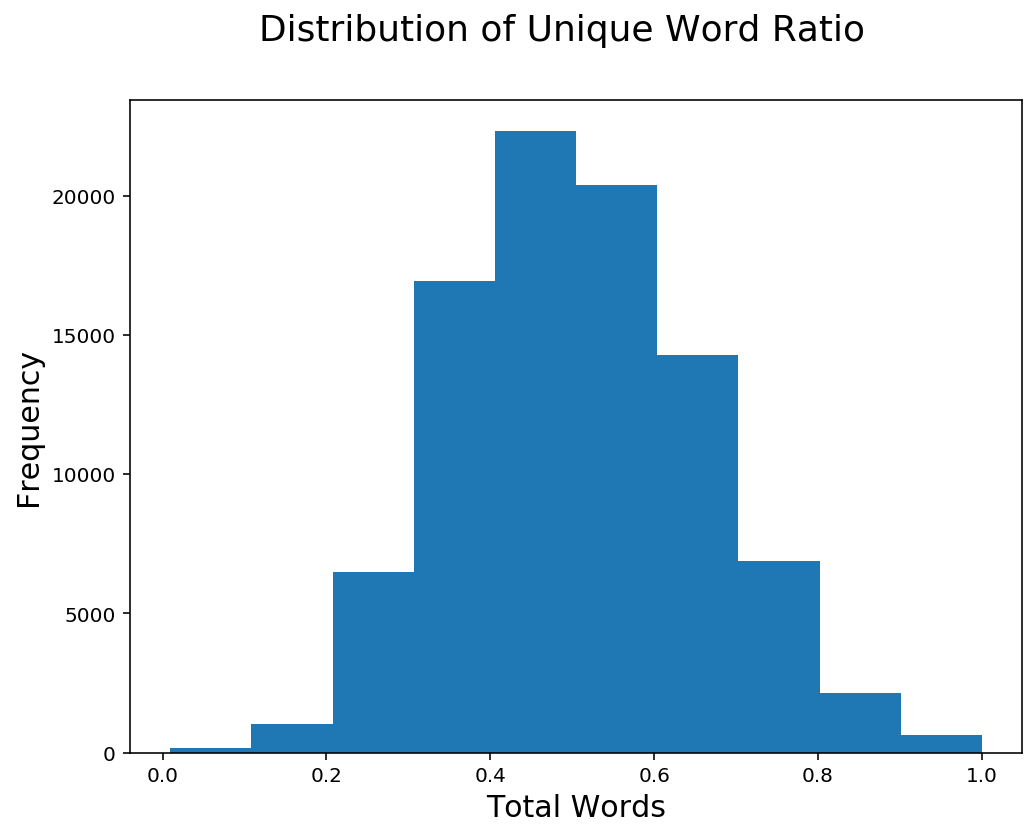

In [17]:
# analysing unique word ratio
# it is normally distributed

fig, ax = plt.subplots(figsize=(8,6))
df.unique_word_ratio.plot(kind='hist')
fig.suptitle('Distribution of Unique Word Ratio', fontsize=18)
plt.xlabel('Total Words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [18]:
# short, mostly instrumental songs where all words are unique
df[df.unique_word_ratio == 1].head()

song  year                    artist  \
465                           prelude  2007  del the funky homosapien   
1544        your potential the beyond  2014              flying lotus   
2499               this silence kills  2011                    dillon   
2971  rose can i share a bed with you  2012              dennis marsh   
4931                           heaven  2011                    g love   

           genre                                             lyrics  \
465      Hip-Hop  Funk Gluttius maximus Dreadlocks There are eig...   
1544     Hip-Hop  Produced by Flying Lotus Love had a name and I...   
2499  Electronic  This silence kills sing for me Fill my heart w...   
2971     Country  oh rose can i share a BED WITH YOUIM LONESOME ...   
4931        Jazz  When days are fallin down from heaven Well you...   

      acousticness  danceability  duration_ms  energy  instrumentalness  ...  \
465         0.0479         0.407      21267.0   0.587          0.961000  ...   
1544        0.1340         0.198     105978.0   0.690          0.902000  ...   
2499        0.0573         0.701     258011.0   0.525          0.694000  ...   
2971        0.8540         0.649     219080.0   0.428          0.000003  ...   
4931        0.7690         0.398     177947.0   0.546          0.000832  ...   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
465     0.3650   -18.617   0.0       0.1650   93.931             3.0    0.357   
1544    0.1080    -6.708   0.0       0.0363  129.058             1.0    0.260   
2499    0.1390   -13.134   0.0       0.0371  130.066             4.0    0.133   
2971    0.2490   -10.812   1.0       0.0284  121.962             4.0    0.596   
4931    0.0985    -5.689   1.0       0.0490   79.923             4.0    0.466   

      total_words  unique_words  unique_word_ratio  
465            19            19                1.0  
1544           14            14                1.0  
2499           11            11                1.0  
2971           17            17                1.0  
4931           23            23                1.0  

[5 rows x 21 columns]

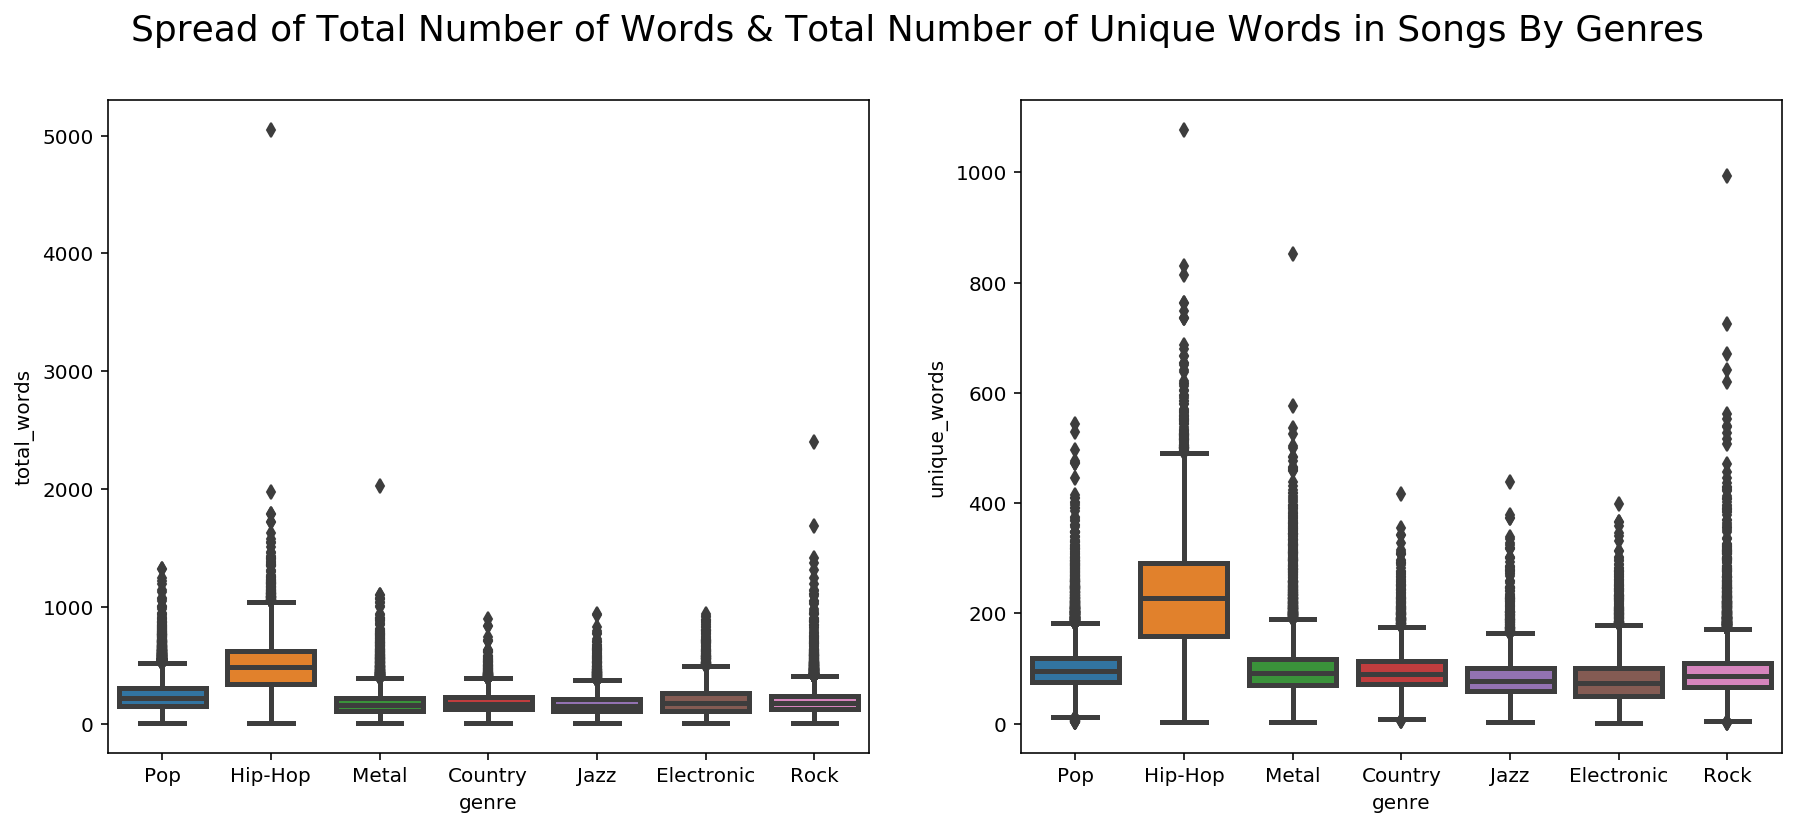

In [20]:
# outliers represent real songs and shouldn't effect results if they remain in the data set as they still follow trends
# for example, hip hop songs are generally longer in length, with a higher number of unique words

fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.boxplot(df.genre, df.total_words, ax=ax[0], linewidth=2.5)
sns.boxplot(df.genre, df.unique_words, ax=ax[1], linewidth=2.5)
fig.suptitle('Spread of Total Number of Words & Total Number of Unique Words in Songs By Genres', fontsize=18)

plt.show()

In [74]:
df[df.genre == 'Hip-Hop']['total_words'].max()

5049

In [75]:
# The song with the highest number of words in its lyrics
df[df.total_words == 5049]

song  year   artist    genre  \
18737  freestyle june 27  2007  big moe  Hip-Hop   

                                                  lyrics  acousticness  \
18737  (Big Moe) Yeee-yeee haahee yeehaa yeee-yaahee ...         0.407   

       danceability  duration_ms  energy  instrumentalness  ...  liveness  \
18737         0.842     325907.0    0.47               0.0  ...     0.113   

       loudness  mode  speechiness   tempo  time_signature  valence  \
18737    -5.448   0.0        0.204  75.182             4.0    0.697   

       total_words  unique_words  unique_word_ratio  
18737         5049          1077            0.21331  

[1 rows x 21 columns]

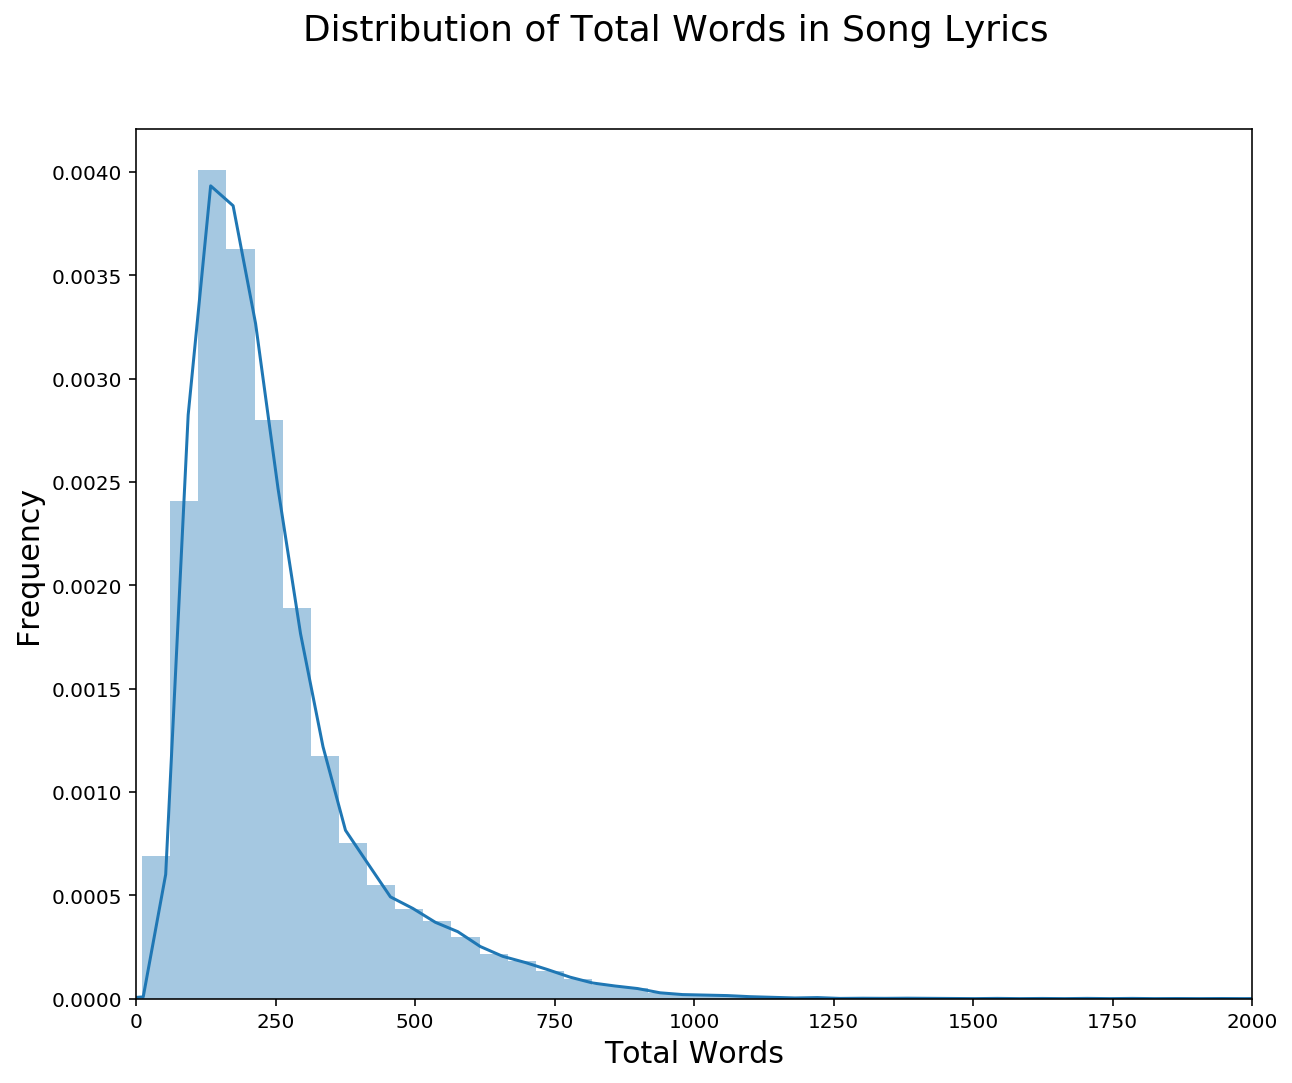

In [76]:
# distribution of total_words for all songs after removing songs with 10 or less words
# it is skewed to the right

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df['total_words'], bins=100)
ax.set_xlim(left=0, right=2000)
fig.suptitle('Distribution of Total Words in Song Lyrics', fontsize=18)
plt.xlabel('Total Words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


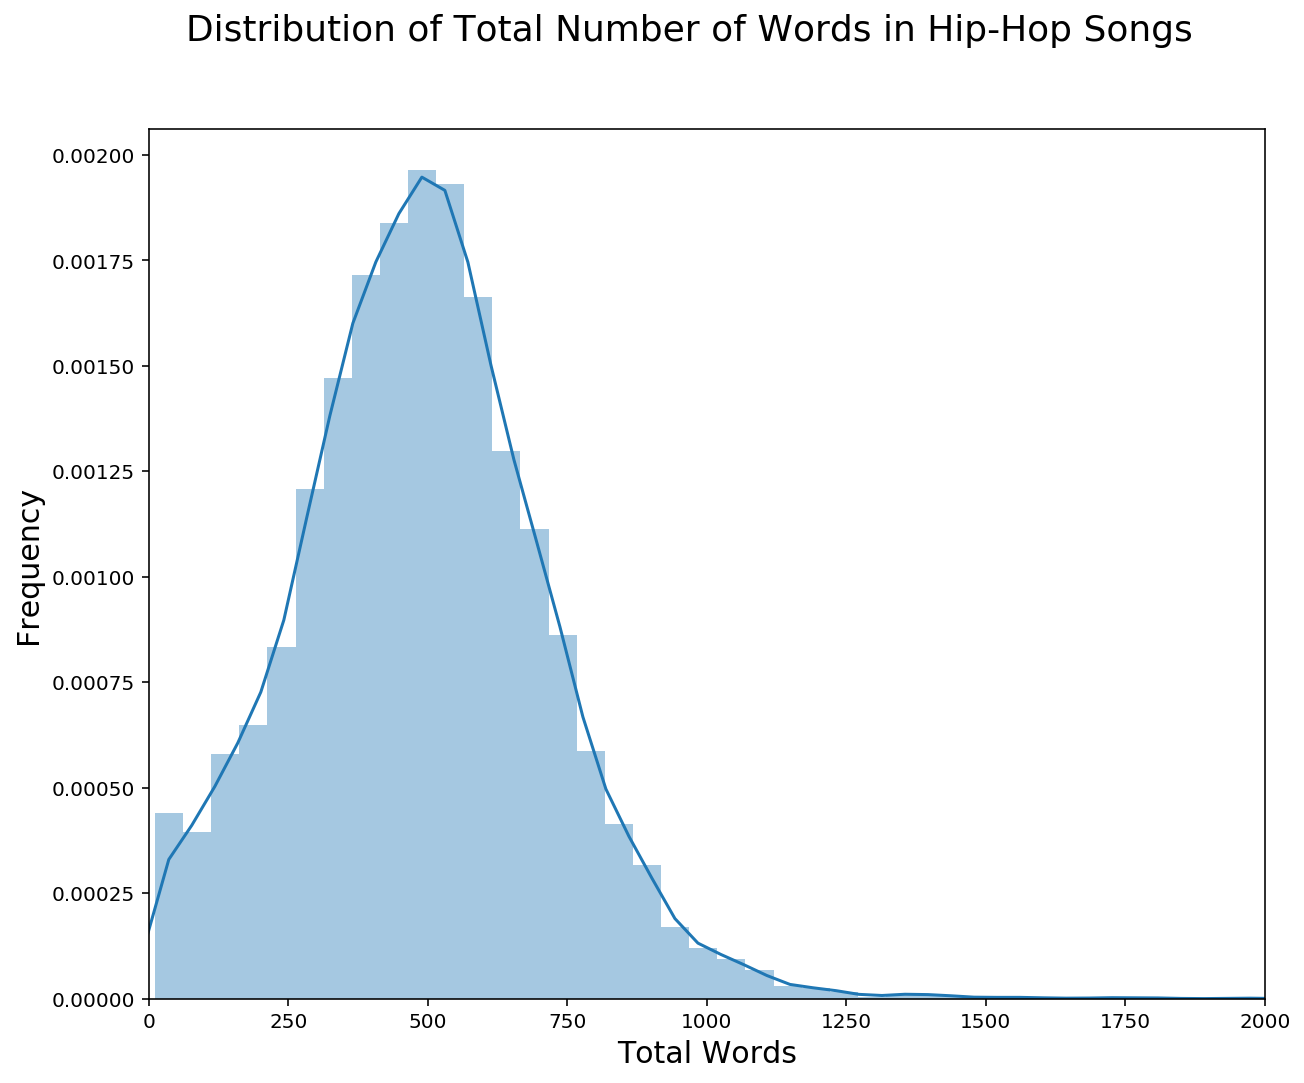

In [77]:
# distribution of total_words for hip-hop songs
# hip-hop has a normal distribution, it is also has the widest distribution of all genres
# this is an important feature that differentiates hip-hop from other genres
# all other genres (shown below this graph) have a similar thinner distribution

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df[df.genre == 'Hip-Hop']['total_words'], bins=100)
ax.set_xlim(left=0, right=2000)
fig.suptitle('Distribution of Total Number of Words in Hip-Hop Songs', fontsize=18)
plt.xlabel('Total Words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


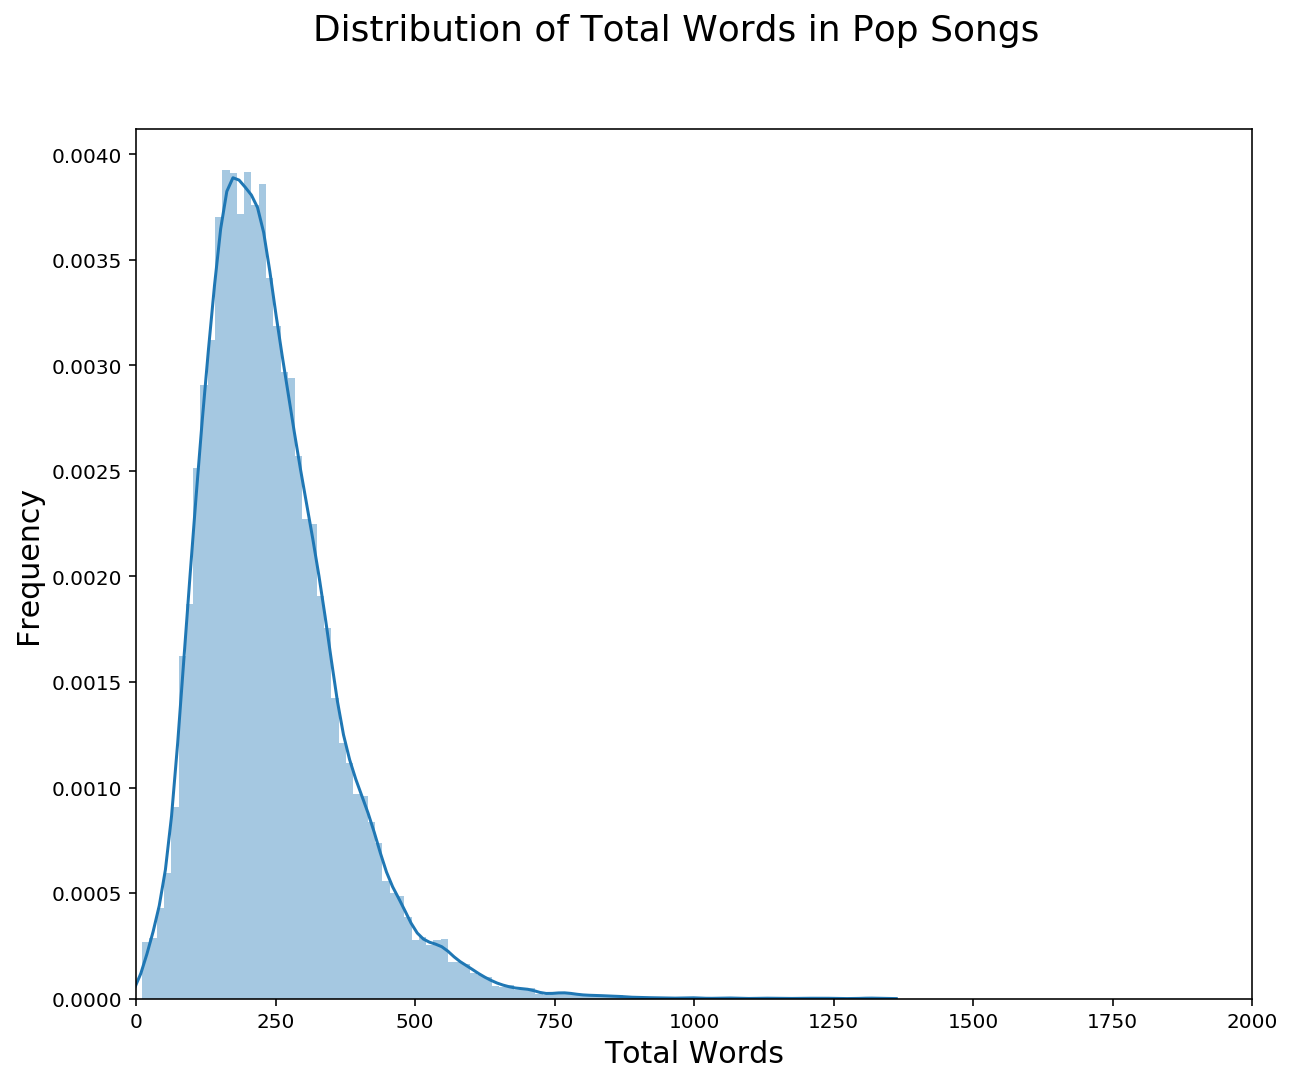

In [78]:
# distribution of total_words for pop songs

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df[df.genre == 'Pop']['total_words'], bins=100)
ax.set_xlim(left=0, right=2000)
fig.suptitle('Distribution of Total Words in Pop Songs', fontsize=18)
plt.xlabel('Total Words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


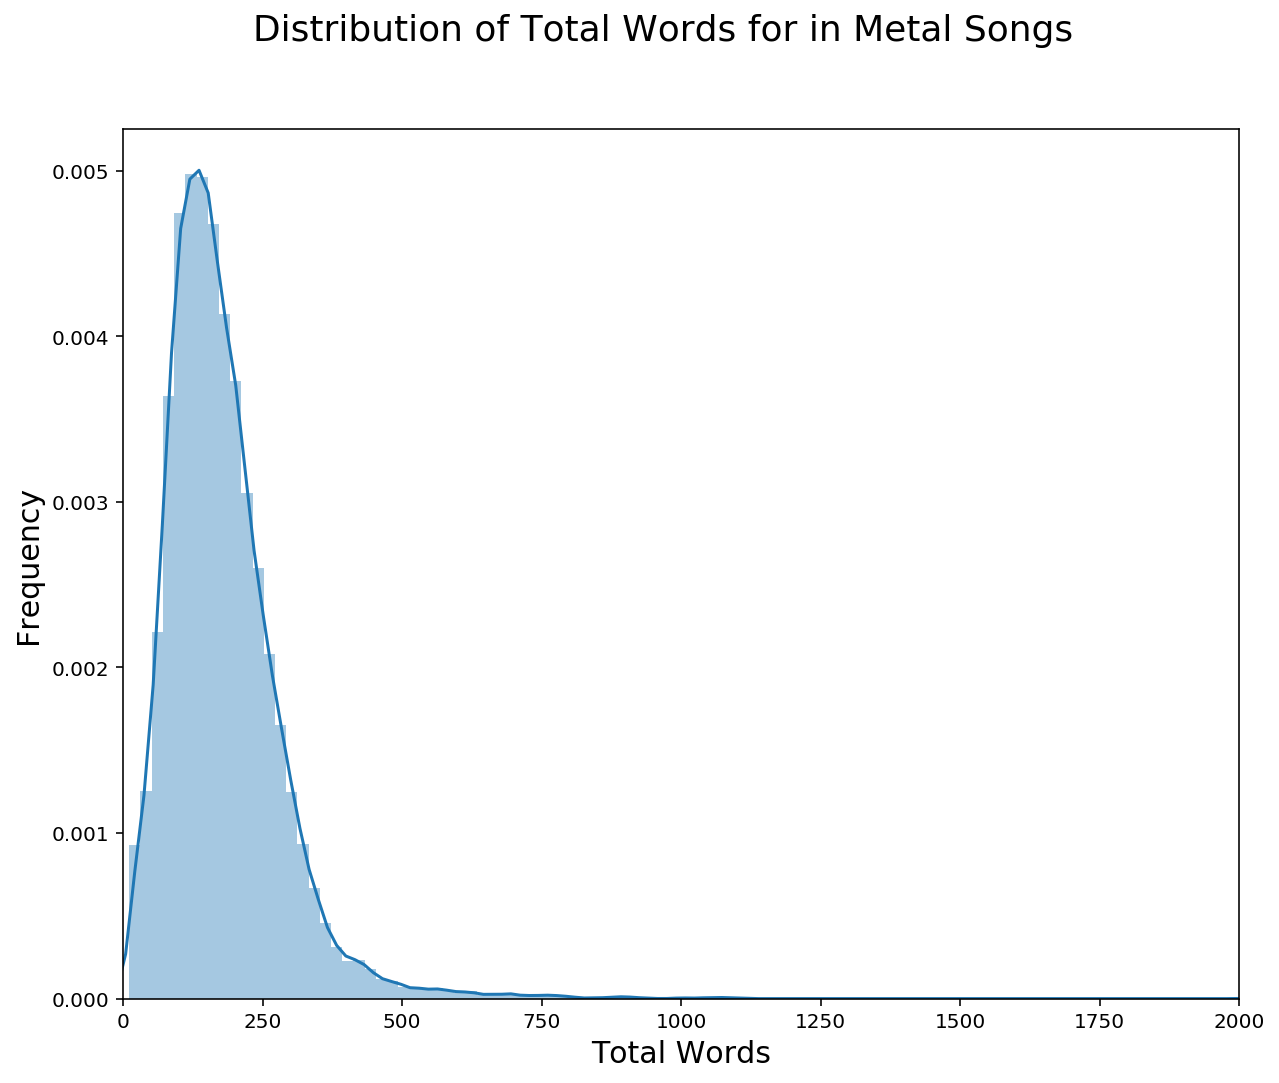

In [79]:
# distribution of total_words for metal songs

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df[df.genre == 'Metal']['total_words'], bins=100)
ax.set_xlim(left=0, right=2000)
fig.suptitle('Distribution of Total Words for in Metal Songs', fontsize=18)
plt.xlabel('Total Words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


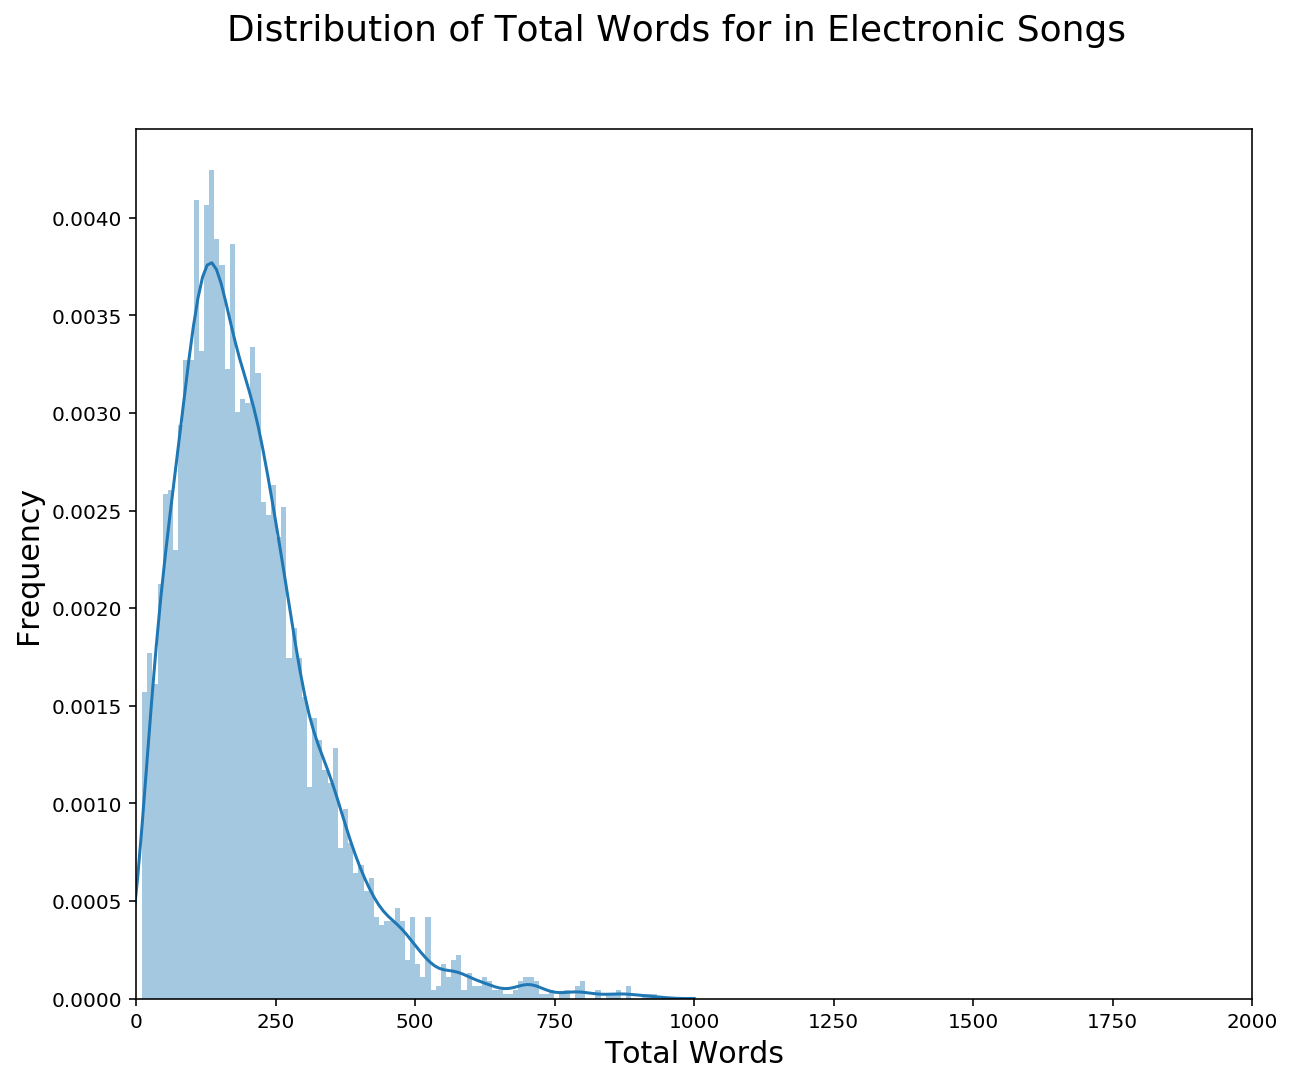

In [82]:
# distribution of total_words for electronic songs

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df[df.genre == 'Electronic']['total_words'], bins=100)
ax.set_xlim(left=0, right=2000)
fig.suptitle('Distribution of Total Words for in Electronic Songs', fontsize=18)
plt.xlabel('Total Words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


### Word Clouds

All Songs:


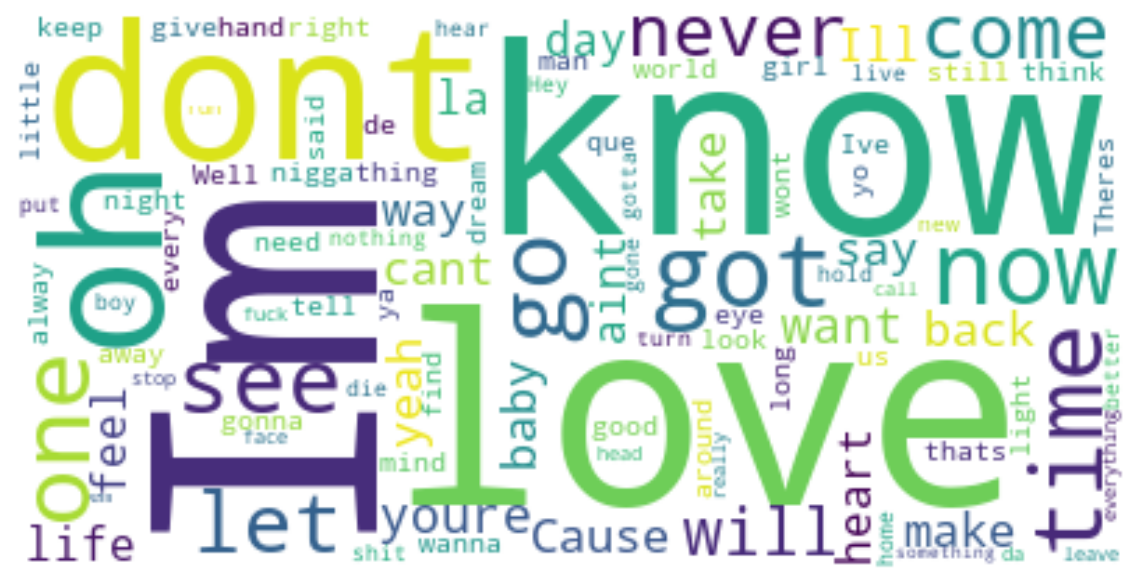

In [84]:
# word cloud using all words from all songs

lyrics = df.lyrics.to_list()
joined = ' '.join(lyrics)

text = joined

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,10))

# Display the generated image
print('All Songs:')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Pop Songs:


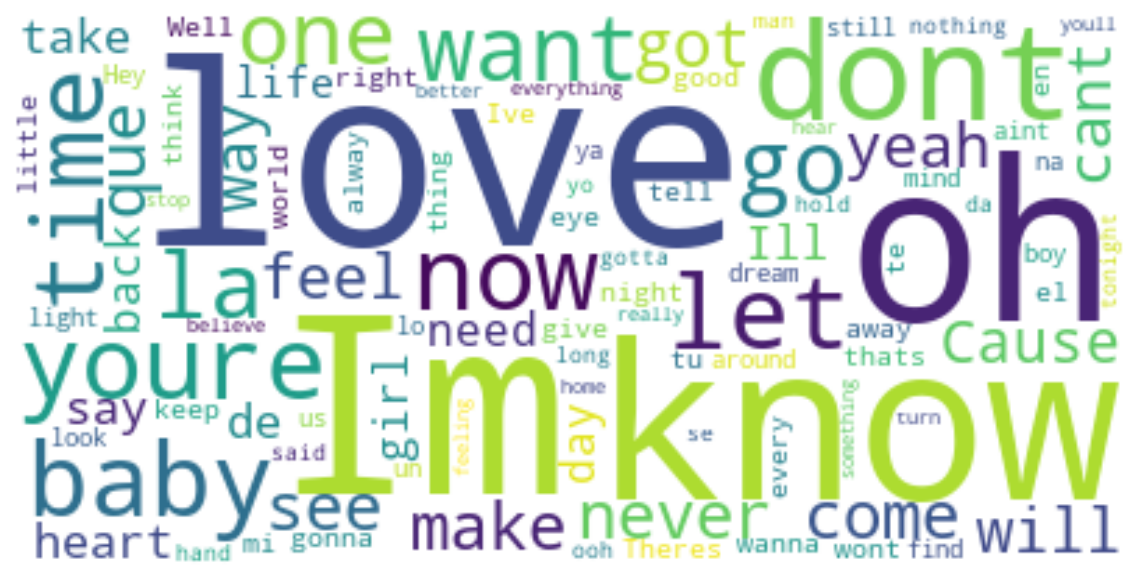

In [85]:
# word cloud using all words from pop songs

lyrics = lyrics = df[df.genre == 'Pop']['lyrics'].values
joined = ' '.join(lyrics)

text = joined

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,10))

# Display the generated image
print('Pop Songs:')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Metal Songs:


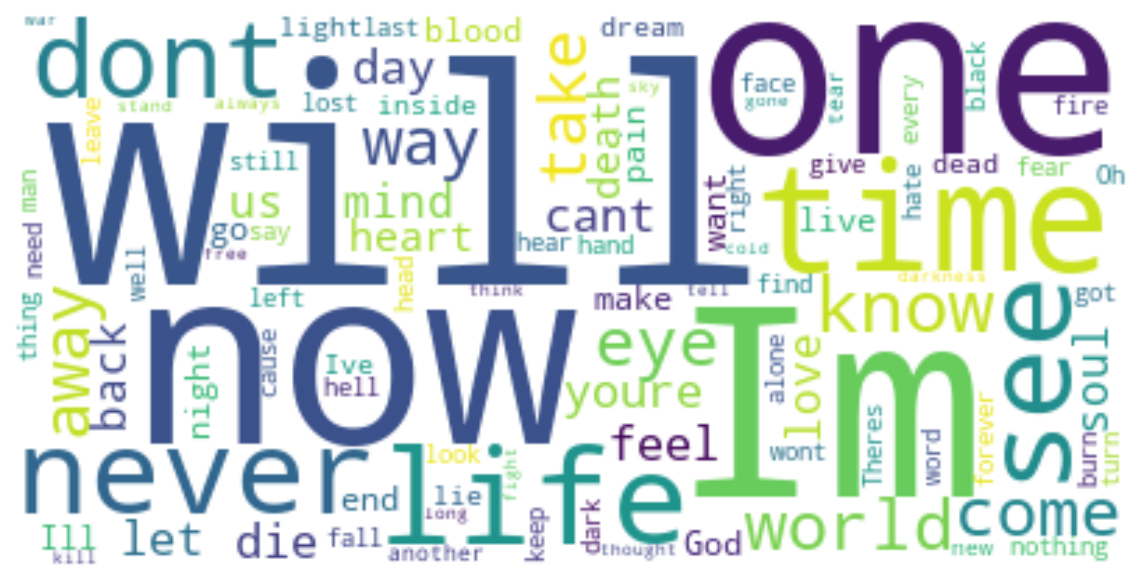

In [86]:
# word cloud using all words from metal songs

lyrics = lyrics = df[df.genre == 'Metal']['lyrics'].values
joined = ' '.join(lyrics)

text = joined

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,10))

# Display the generated image
print('Metal Songs:')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Hip-Hop Songs:


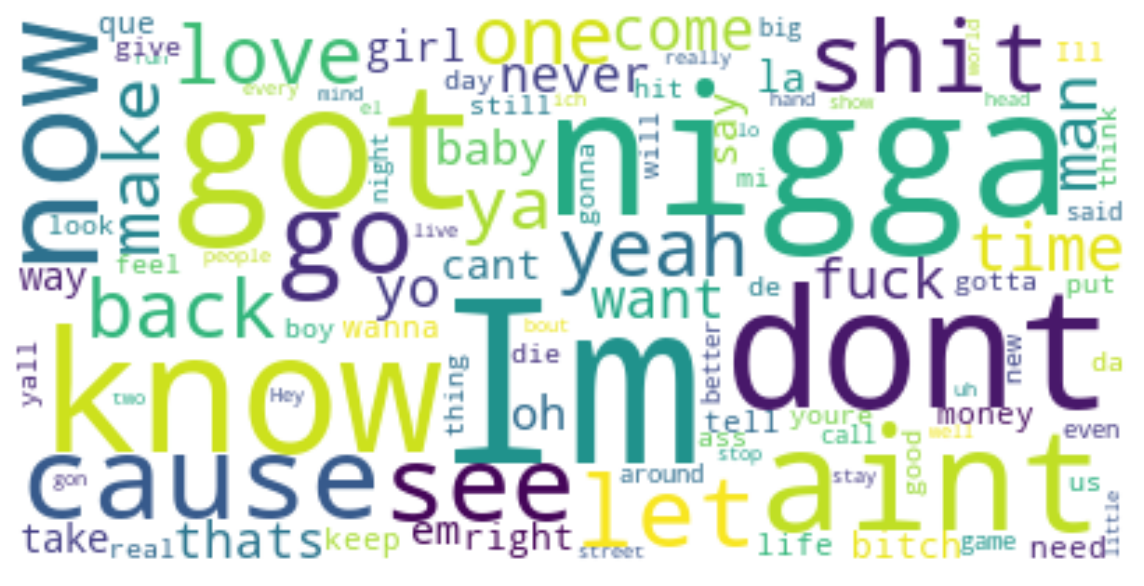

In [87]:
# word cloud using all words from hip-hop songs

lyrics = lyrics = df[df.genre == 'Hip-Hop']['lyrics'].values
joined = ' '.join(lyrics)

text = joined

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,10))

# Display the generated image
print('Hip-Hop Songs:')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Country Songs:


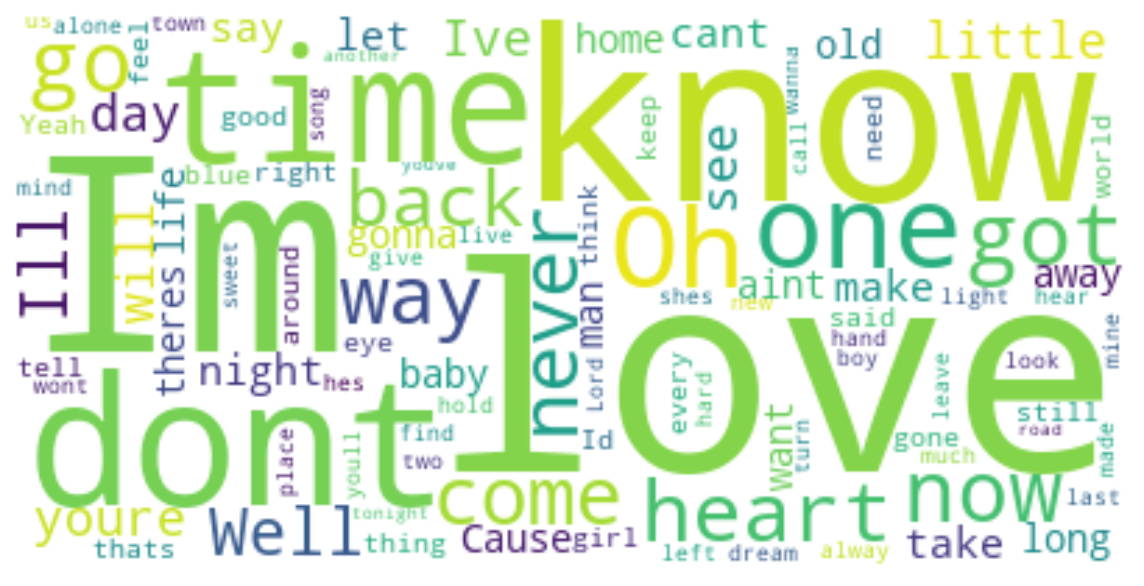

In [88]:
# word cloud using all words from country songs

lyrics = lyrics = df[df.genre == 'Country']['lyrics'].values
joined = ' '.join(lyrics)

text = joined

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,10))

# Display the generated image
print('Country Songs:')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Jazz Songs:


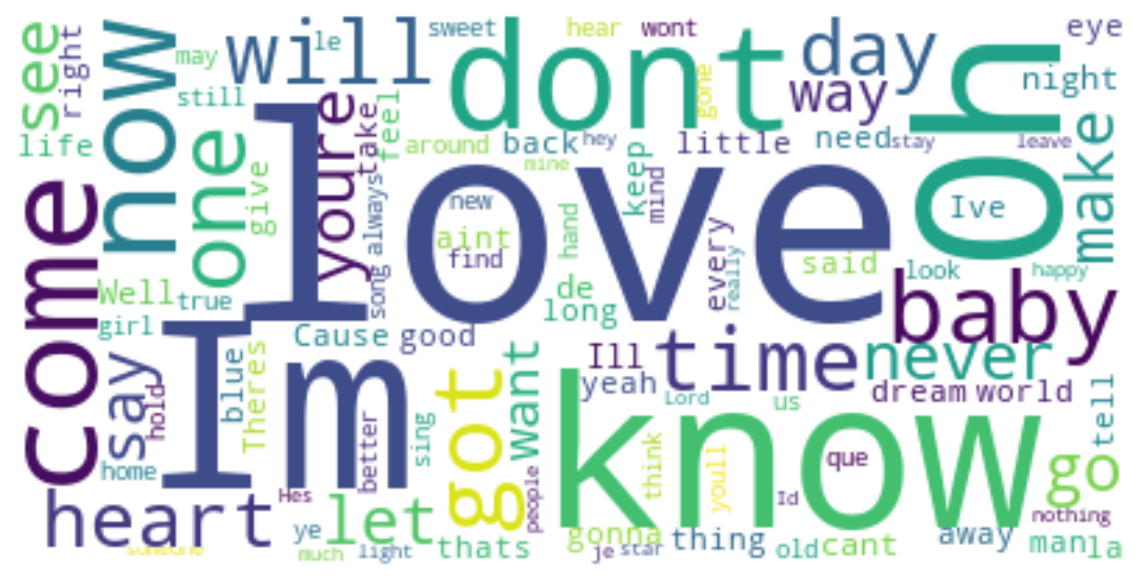

In [89]:
# word cloud using all words from jazz songs

lyrics = lyrics = df[df.genre == 'Jazz']['lyrics'].values
joined = ' '.join(lyrics)

text = joined

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,10))

# Display the generated image
print('Jazz Songs:')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Electronic Songs:


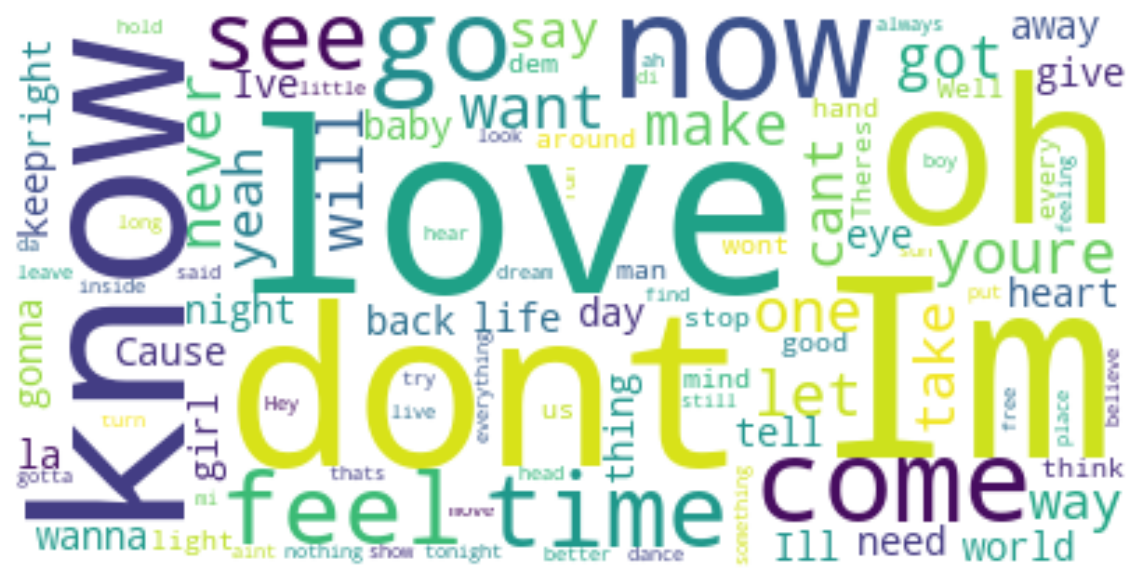

In [90]:
# word cloud using all words from electronic songs

lyrics = lyrics = df[df.genre == 'Electronic']['lyrics'].values
joined = ' '.join(lyrics)

text = joined

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,10))

# Display the generated image
print('Electronic Songs:')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Rock Songs:


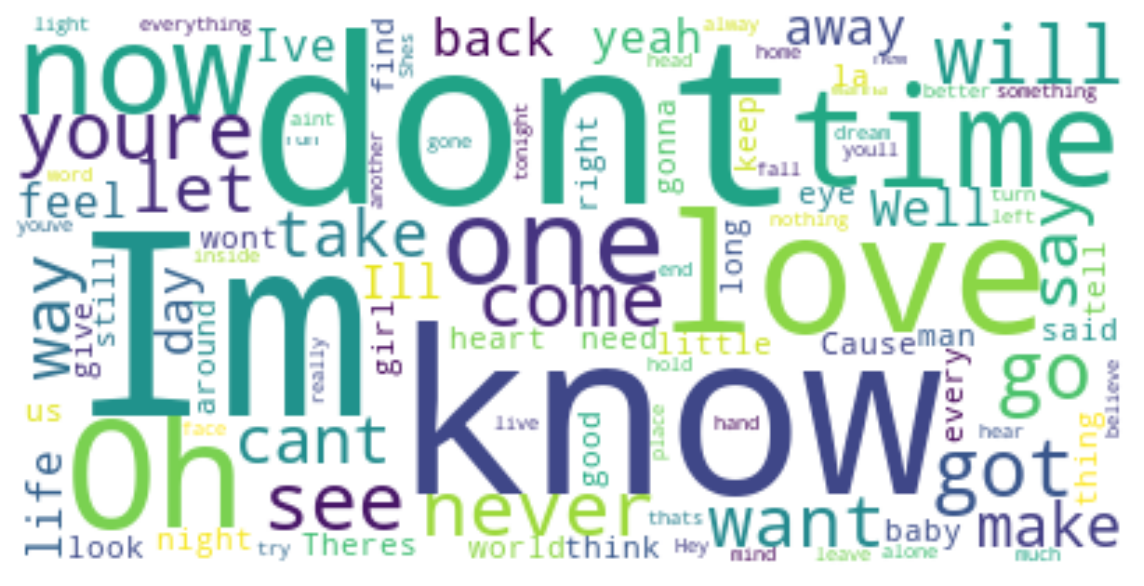

In [91]:
# word cloud using all words from rock songs

lyrics = lyrics = df[df.genre == 'Rock']['lyrics'].values
joined = ' '.join(lyrics)

text = joined

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,10))

# Display the generated image
print('Rock Songs:')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Correlation of Spotify Audio Features

Definition of Spotify's Audio Features:
- **Duration (ms)** - The duration of the track in milliseconds
- **Key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation e.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on, if no key was detected, the value is -1
- **Mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived, major is represented by 1 and minor is 0
- **Time Signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)
- **Acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic, 1.0 represents high confidence the track is acoustic
- **Danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity, a value of 0.0 is least danceable and 1.0 is most danceable
- **Energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity, typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy
- **Instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0
- **Liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **Loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db
- **Speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **Valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **Tempo** - The overall estimated tempo of a track in beats per minute (BPM), in musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

The definition of spotify's audio features can also be found on: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/


In [92]:
numeric = df.select_dtypes(exclude='object')

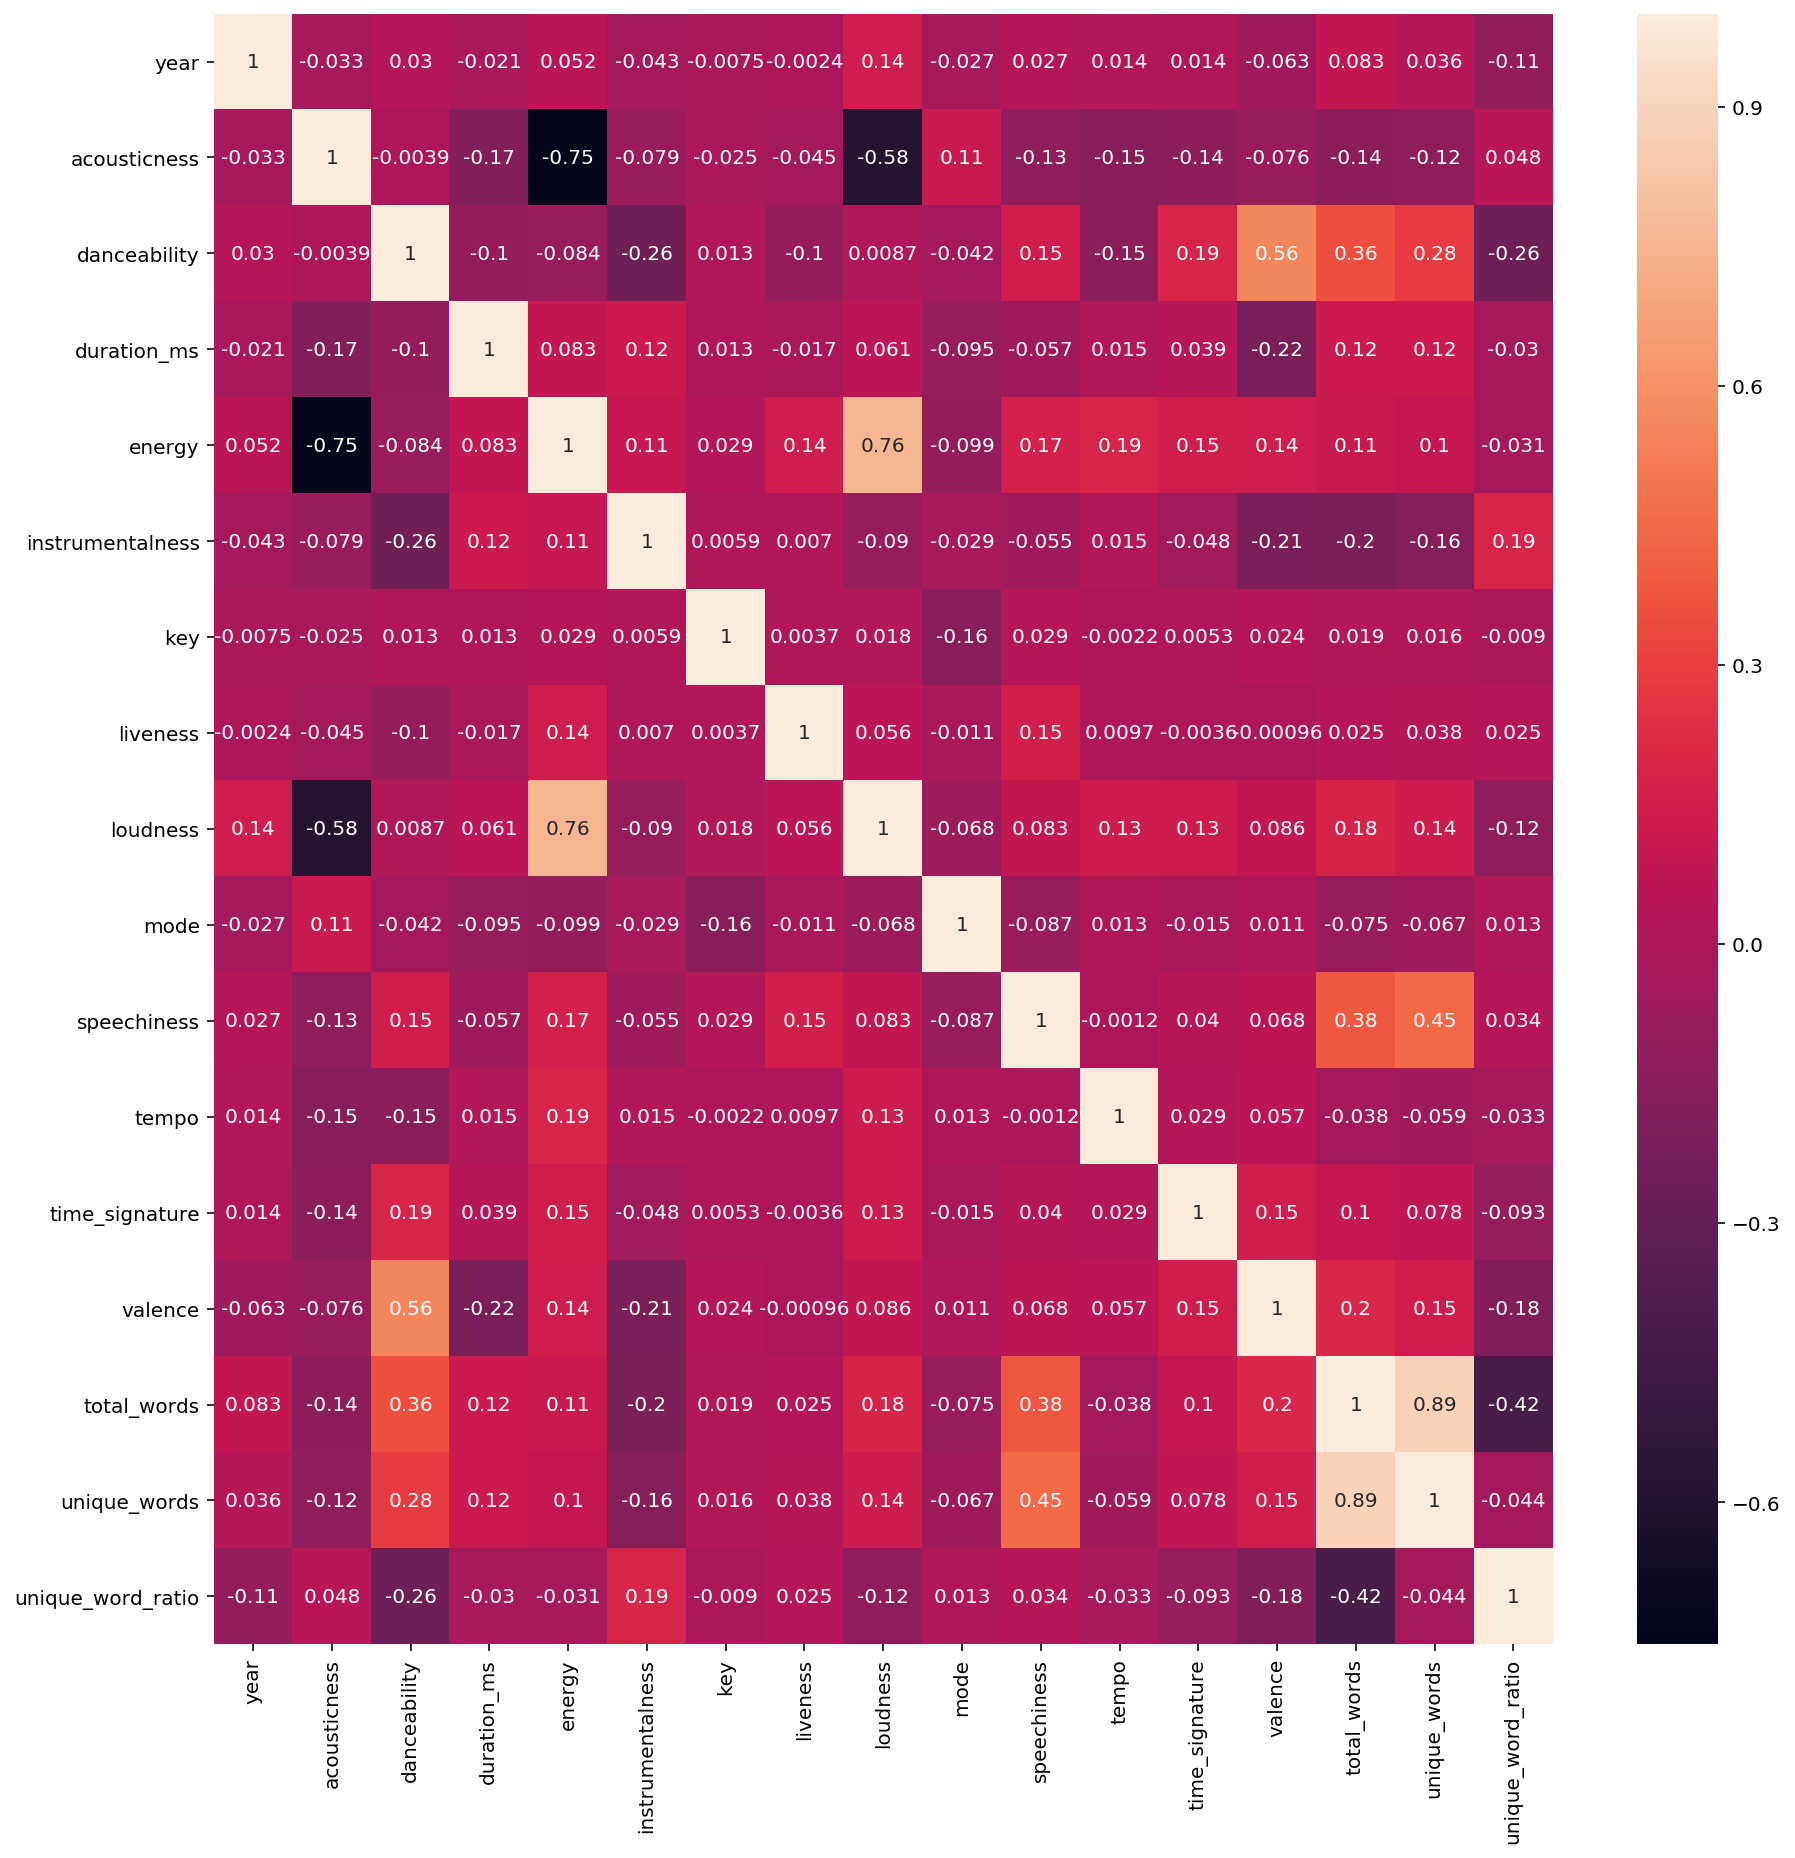

In [93]:
# a heatmap of only numeric features in the dataset
# all audio features have behaved as expected
# loudness + energy, total_words + unique_words are all highly postively correlated
# valence + danceability, speechiness + unique_words + total_words are somewhat postively correlated
# loudness + accousticness are somewhat negatively correlated
# energy + acousticness are highly negatively correlated 

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(numeric.corr(), annot=True)
ax.set_ylim(numeric.corr().shape[1], 0)
plt.show()

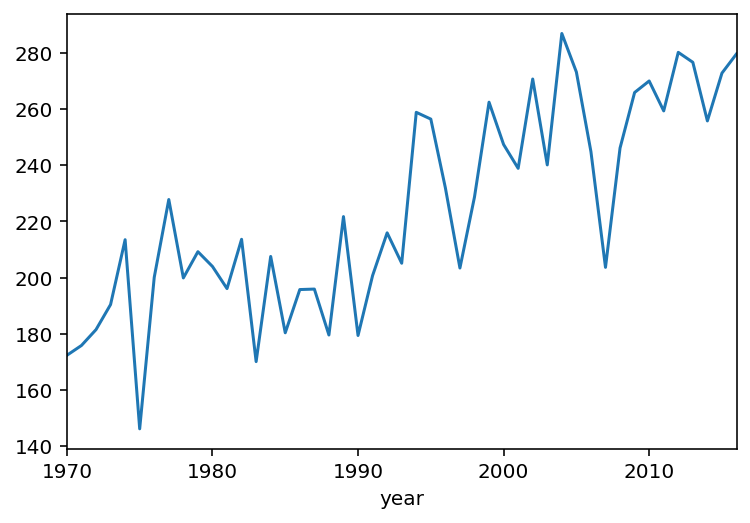

In [112]:
# I have looked at how the mean total words, mean unique words and unique word ratio changes over time
# however due to the skew in the dataset this has not proven useful

df.groupby('year')['total_words'].mean().plot();

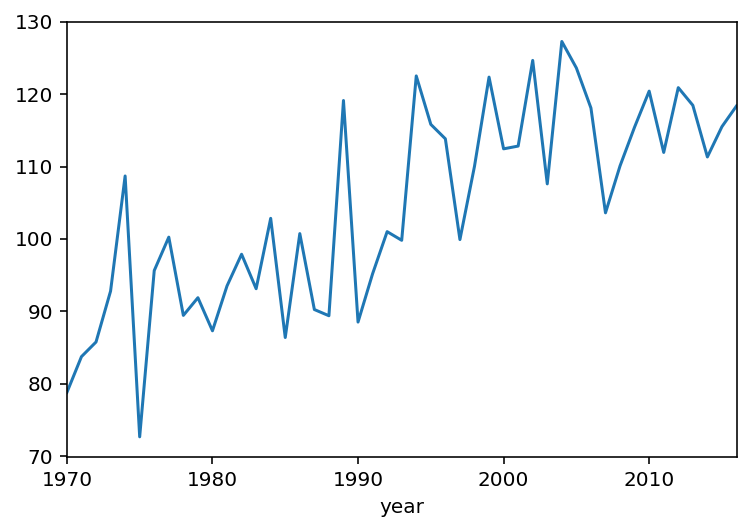

In [114]:
df.groupby('year')['unique_words'].mean().plot();

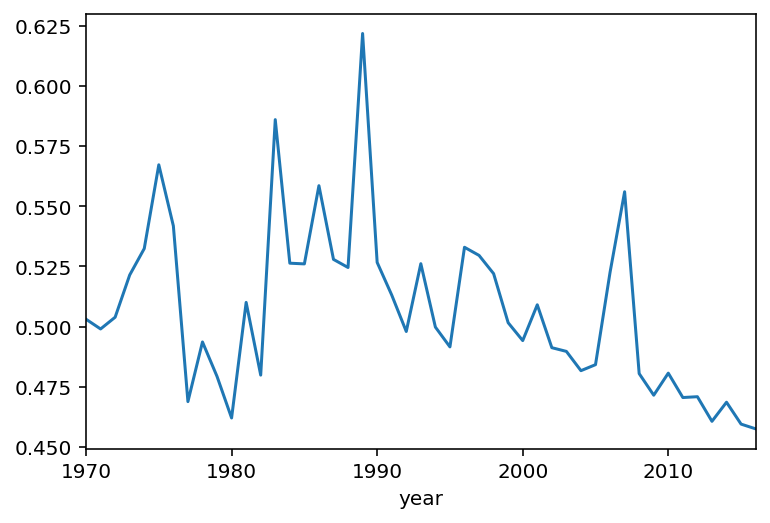

In [116]:
df.groupby('year')['unique_word_ratio'].mean().plot();

In [118]:
df.to_csv('/Users/sarinaamin/Desktop/capstone/genre-predictions-v2/kaggle-post-eda-190120.csv')